<a href="https://colab.research.google.com/github/rajarishiR/programm/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }

df = pd.DataFrame(candidates,columns= ['gmat', 'gpa','work_experience','admitted'])
df.head()

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0


In [ ]:
df.isnull().sum()

gmat               0
gpa                0
work_experience    0
admitted           0
dtype: int64

In [ ]:
df.shape

(40, 4)

In [ ]:
df.describe()

,gmat,gpa,work_experience,admitted
count,40.000000,40.000000,40.000000,40.000000
mean,654.000000,3.095000,3.425000,0.475000
std,61.427464,0.631218,1.737778,0.505736
min,540.000000,1.700000,1.000000,0.000000
25%,607.500000,2.700000,2.000000,0.000000
50%,660.000000,3.300000,4.000000,0.000000
75%,690.000000,3.700000,5.000000,1.000000
max,780.000000,4.000000,6.000000,1.000000


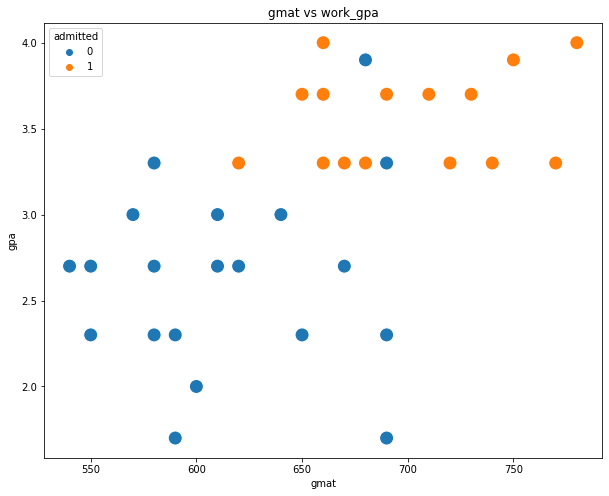

In [ ]:
# plotting the data to find linear decision boundary
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.scatterplot(x='gmat', y='gpa', hue='admitted', data=df, s=200)
plt.xlabel('gmat')
plt.ylabel('gpa')
plt.title('gmat vs work_gpa')
plt.show()

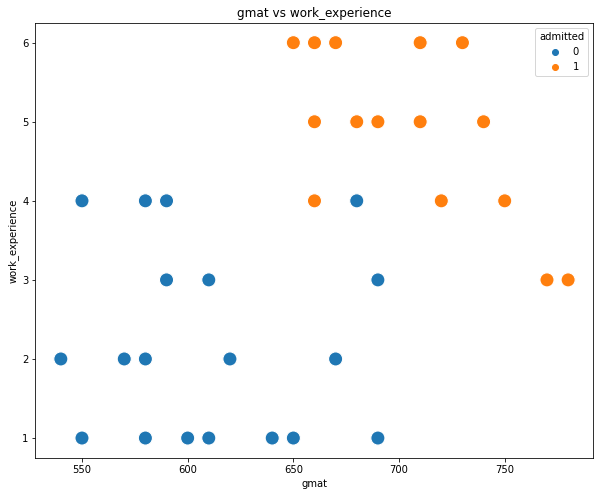

In [ ]:
# ploting another possibilites
plt.figure(figsize=(10, 8))
sns.scatterplot(x='gmat', y='work_experience', hue='admitted', data=df, s=200)
plt.xlabel('gmat')
plt.ylabel('work_experience')
plt.title('gmat vs work_experience')
plt.show()

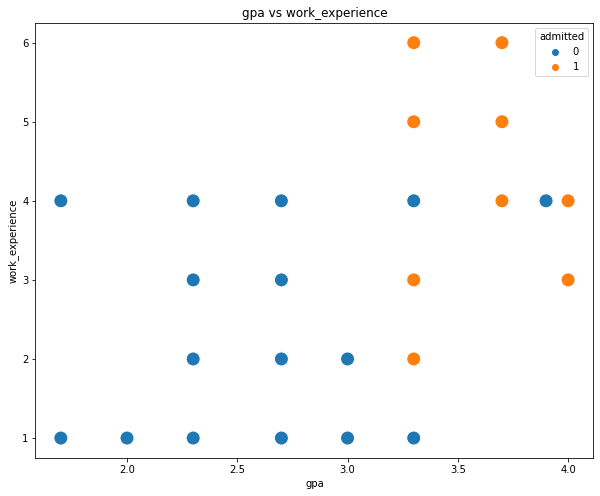

In [ ]:
# plotting another possibilities
plt.figure(figsize=(10, 8))
sns.scatterplot(x='gpa', y='work_experience', hue='admitted', data=df, s=200)
plt.xlabel('gpa')
plt.ylabel('work_experience')
plt.title('gpa vs work_experience')
plt.show()

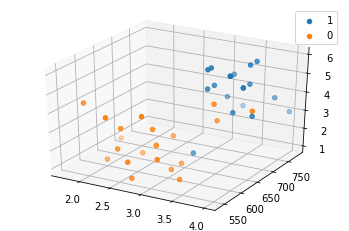

In [ ]:
# since we have three feature we can also plot in a single 3d plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for s in df.admitted.unique():
    ax.scatter(df.gpa[df.admitted==s],df.gmat[df.admitted==s],df['work_experience'][df.admitted==s],label=s)
    
ax.legend()

1.The above plot shows clearly that there is a clear linear decision boundray.

2.The plot shows that people with high scores in gmat,gpa and more work experience gets selected to the university.


In [ ]:
# spliting the data
from sklearn.model_selection import train_test_split
x = df[['gmat','gpa','work_experience']].values
y = df['admitted'].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

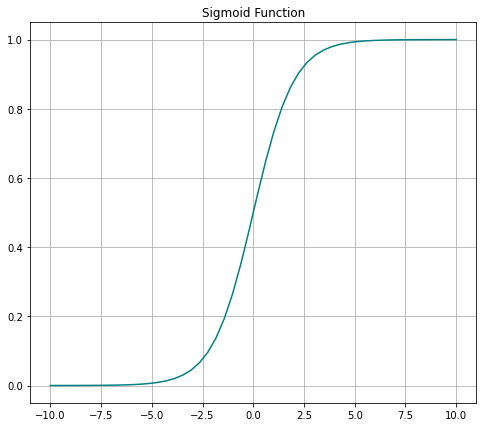

In [ ]:
#ploting the sigmoid function
# it is not necessary to plot the sigmoid function
def sigmoid(x):
  return(1/(1 + np.exp(-x)))

x_values_for_sigmoid = np.linspace(-10, 10)
plt.figure(figsize=(8, 7))
plt.plot(x_values_for_sigmoid, sigmoid(x_values_for_sigmoid), c='teal')
plt.title('Sigmoid Function')
plt.grid(True)
plt.show()

In [ ]:
# ml algorithm
from sklearn.linear_model import LogisticRegression 
logistic_regression= LogisticRegression() 
logistic_regression.fit(x_train,y_train) 
y_pred=logistic_regression.predict(x_train)

In [ ]:
y_pred 

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
# to get the probability
logistic_regression.predict_proba(x_test)

array([[0.98884159, 0.01115841],
       [0.98200489, 0.01799511],
       [0.03717722, 0.96282278],
       [0.21374624, 0.78625376],
       [0.96805619, 0.03194381],
       [0.9973502 , 0.0026498 ],
       [0.05672066, 0.94327934],
       [0.05277677, 0.94722323]])

In [ ]:
# m parameter
v = logistic_regression.coef_
x = v.flatten()
df1 = pd.DataFrame(x,['gmat','gpa','work_experience'], columns=['coefficient'])
df1  

,coefficient
gmat,0.035993
gpa,0.692300
work_experience,1.363499


In [ ]:
# c parameter
logistic_regression.intercept_

array([-31.32703489])

In [ ]:
r1=y_train.flatten()
r2=y_pred.flatten()
df2 = pd.DataFrame({'Actual':r1, 'Predicted':r2})
df2

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
5,0,0
6,1,1
7,0,0
8,1,1
9,0,0
